# Digit Recognizer

Os arquivos de dados train.csv e test.csv contêm imagens em escala de cinza de dígitos desenhados à mão, de zero a nove.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuro. Esse valor de pixel é um inteiro entre 0 e 255, inclusive.

O conjunto de dados de treinamento, (train.csv), tem 785 colunas. A primeira coluna, chamada "label", é o dígito que foi desenhado pelo usuário. O restante das colunas contém os valores de pixel da imagem associada.

Cada coluna de pixel no conjunto de treinamento tem um nome como pixelx, onde x é um inteiro entre 0 e 783, inclusive. Para localizar esse pixel na imagem, suponha que tenhamos decomposto x como x = i * 28 + j, onde i e j são inteiros entre 0 e 27, inclusive. Em seguida, o pixelx está localizado na linha i e na coluna j de uma matriz 28 x 28 (indexação por zero).

Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha a partir do topo, como no diagrama ascii abaixo.

Visualmente, se omitirmos o prefixo "pixel", os pixels comporão a imagem da seguinte forma:

    000 001 002 003 ... 026 027
    028 029 030 031 ... 054 055
    056 057 058 059 ... 082 083
     |   |   |   |  ...  |   |
    728 729 730 731 ... 754 755
    756 757 758 759 ... 782 783 

O conjunto de dados de teste, (test.csv), é o mesmo que o conjunto de treinamento, exceto que ele não contém a coluna "label".

Ele sera utilizada para a medição da acuracia pelo kaggle. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv');
df_test = pd.read_csv('test.csv');

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analise dos dados
Analizando os dados para tomar uma descisao de como processalos.

In [5]:
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df_train['label'].count()

42000

In [8]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

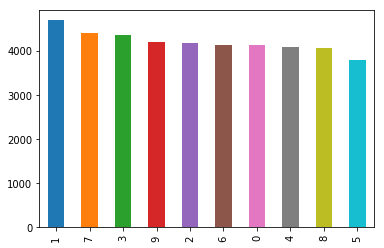

In [9]:
df_train['label'].value_counts().plot(kind='bar');

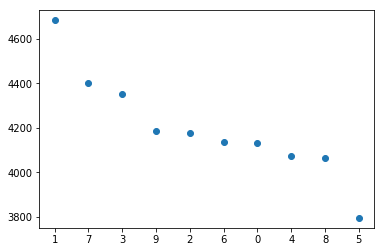

In [10]:
plt.scatter(['1','7','3','9','2','6','0','4','8','5'],df_train['label'].value_counts());

### Extraindo features e labels

In [11]:
X = df_train.values[:,1:]
y = df_train.values[:,0]

In [12]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### obtendo valores para teste e treino

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y);

#### Standartizando

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
stand = StandardScaler()

Convertendo featura de test e treino para *float64*  antes de standartzar

In [37]:
X_train_std = stand.fit_transform(np.float64(X_train));
X_test_std = stand.transform(np.float64(X_test));

## Criando modelos

##### KNN

Definindo vetor para k

In [17]:
kn = [2,3,5]

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=3)

Vetor com os modelos de calculo para o KNeighbors

In [50]:
distancia = ['euclidean']
# ,'manhattan','chebyshev','minkowski'

Dicionario com as predições realizadas

In [21]:
y_pred_sk = {}
y_pred_sk['euclidean'] = {2:[],3:[],5:[],8:[]}
y_pred_sk['manhattan'] = {2:[],3:[],5:[],8:[]}
y_pred_sk['chebyshev'] = {2:[],3:[],5:[],8:[]}
y_pred_sk['minkowski'] = {2:[],3:[],5:[],8:[]}

### Calculando predição

In [22]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
modelKNN_skl.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
y_pred = modelKNN_skl.predict(X_test_std)

In [51]:
for d in distancia:
    for k in kn:
        modelKNN_skl = KNeighborsClassifier(n_neighbors=k, metric=d)
        modelKNN_skl.fit(X_train_std,y_train);
        y_pred_sk[d][k] = modelKNN_skl.predict(X_test_std);

In [70]:
pd.DataFrame({'Real':y_test,'Predito':y_pred})

,Real,Predito
0,1,1
1,8,8
2,6,6
3,9,7
4,5,5
5,7,7
6,6,6
7,7,7
8,7,7
9,7,7


## Metricas

### Accurracy, Precision, Recall, F1

In [27]:
from sklearn import metrics

In [69]:
for d in distancia:
    print(d)
    for k in kn:
        print('K',k)
        print('accuracy ',metrics.accuracy_score(y_test,y_pred_sk[d][k]))
        print('precision',metrics.precision_score(y_test,y_pred_sk[d][k],average='weighted'))
        print('recall   ',metrics.recall_score(y_test,y_pred_sk[d][k],average='weighted'))
        print('f1       ',metrics.f1_score(y_test,y_pred_sk[d][k],average='weighted'))

euclidean
K 2
accuracy  0.9273809523809524
precision 0.92881425276159
recall    0.9273809523809524
f1        0.9268577146937609
K 3
accuracy  0.9379761904761905
precision 0.9385989582663106
recall    0.9379761904761905
f1        0.9377013718376772
K 5
accuracy  0.9375
precision 0.9378846545314174
recall    0.9375
f1        0.9372497065143035
